# House Price Prediction

# Table of Contents
* 1.Background
* 2.Prepare the data
    * [2.1.Load data](#loaddata)
    * [2.2.Understand dataset](#understanddata)
* 3.Processing Data
    * 3.1. Clean Data
        <br>[Bar plot: Percentage of training missing value](#trainmissing)
        <br>[Bar plot: Percentage of testing missing value](#testmissing)
    * 3.2. Understand value of data
        <br>[Distribution plot and Probability plot: Sale price](#sale)
        <br>[Distribution plot and Probability plot: Ground Living Area](#gla)
        <br>[Distribution plot and Probability plot: Garage Area](#gaf)
* 4.Feature Engineering
    * [4.1 Pre-build Plot Function](#prebuilt)
    * [4.2.Feature Selection](#selection)
        <br>[Pearson correlation cofficient](#pearsonheatmap)
        <br>[Random Forest](#forest)
    * [4.3.Understand features](#relation)
        * Numerical Features vs Sale Price
        <br>[Pairplot: important features with sale price](#pairplot)
        <br>[Scatter plt: Ground Living Area vs Sale Price](#scattergla)
        <br>[Scatter plt: Ground living Area vs Sale price group by overall quality](#scattergla+)
        <br>[3D Scatter plt: Ground living Area vs Sale price group by overall quality](#scatter3Dgla)
        <br>[Scatter plt: Area features VS Sale Price](#area)
        <br>[Scatter plt: All Area VS Sale Price](#scatterallarea)
        * Categorical Features vs Sale Price
        <br>[Box plt: Over all quality VS Sale Price](#overall)
        <br>[Box plt: Year Built VS Sale Price](#year)
        <br>[Scatter plt: Year Built VS Sale Price group by house style](#yearstyle)
        <br>[Scatter plt: Year Built VS Sale Price group by Neighbourhood](#yearneigh)
        <br>[Box plt: MS Zooming vs Sale Price](#ms)
        <br>[Box plt: MS SubClass VS Sale Price](#msclass)
        <br>[Box plt: Neighbourhood vs Sale Price](#neighbourhood)
        * Feature vs Feature
        <br>[Box plt: Groud Living Area VS Total rooms above grade](#glatagbox)
        <br>[Box plt: Garage Car vs Garage Area](#garagecar)
        <br>[Scatter plt: Year Sold pattern](#yearsold)
        <br>[Scatter plt: Month Sold pattern](#monthsold)
* 5.Build Model
    * [5.1 Prepareing Dataset](#predata)
    * 5.2 Building Simple Model
        <br> [Simple regressors](#buildmodel)
        <br> [GridSearch](#gridsearch)
        <br> [Summry](#sumsimple)
    * 5.3 Building Emsemble Model
        <br> [Summry](#sumemsemble)
    * [5.4 Predict price](#predict)
    * [5.5 Neural Network](#tenor)
   

# 1. Background <a name=“background”></a>:
    Of course, every one wants to have their own dream house, but people need to consider  lots of conditions, like location of house, house quality, whethere any school near the neiborhood etc.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## scipy
from scipy import stats

##xgboost
import xgboost
from xgboost import plot_importance

## matplotlib
import seaborn as sns; sns.set() # data visulization
import matplotlib.pyplot as plt # data visulization
%matplotlib inline

from collections import OrderedDict

## plotly
import plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## sklearn Preprocessing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold, cross_val_score, train_test_split

## sklearn modeling
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'data_description.txt', 'train.csv']


# 2. Prepare the data <a name="perpare">
## 2.1 Load data from csv <a name = "loaddata">

In [146]:
## read train.csv file into a pd dataframe named as df_train
df_train = pd.read_csv('../input/train.csv')
print('done')

done


In [147]:
## read test.csv file into a pd dataframe named as df_test
df_test = pd.read_csv('../input/test.csv')
print('done')

done


## 2.2 Understand Dataset<a name = "understanddata">

### 2.2.1 Take a look of all features

In [148]:
## print out all of the colums in df_train
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [149]:
## print out all of the colums in df_test
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 2.2.2 Take a look of dataset size

In [150]:
## print out shape
print(df_train.drop_duplicates().shape)
print(df_test.drop_duplicates().shape)


(1460, 81)
(1459, 80)


### 2.2.3 Describe data

In [151]:
## describe df_train
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [152]:
## print first 5 rows of df_train
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
print(df_train.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [154]:
## describe df_test
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [155]:
## print first 5 rows of df_test
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [156]:
print(df_test.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         1

# 3. Data processing<a name='dataprocess'>

## 3.1 Data clean<a name='dataclean'>
### 3.1.1 Drop 'ID'

In [157]:
test_id = df_test['Id']
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

### 3.1.2 Drop columns which percentage of missing value is greater than 15%

* Trainning Data

In [14]:
## count how many missing value which features have
missing_total = df_train.isnull().sum().sort_values(ascending = False)

## calculate percentage of missing data of each feature
percent = (missing_total / df_train.isnull().count()).sort_values(ascending = False)

## combine total numbers and percent into a dataframe
percent_missing_data = pd.concat([missing_total,percent],axis=1,keys=['Total','Percent'],sort=False)

## assign a continus numbers to dataframe as Index to order to plot text value from each features in barplot
Index = range(0,80)
percent_missing_data['Index'] = Index

## print first 20 rows of data
percent_missing_data.head(20)

,Total,Percent,Index
PoolQC,1453,0.995205,0
MiscFeature,1406,0.963014,1
Alley,1369,0.937671,2
Fence,1179,0.807534,3
FireplaceQu,690,0.472603,4
LotFrontage,259,0.177397,5
GarageType,81,0.055479,6
GarageCond,81,0.055479,7
GarageFinish,81,0.055479,8
GarageQual,81,0.055479,9


Barplot: Percentage of training missing value <a name = "trainmissing">

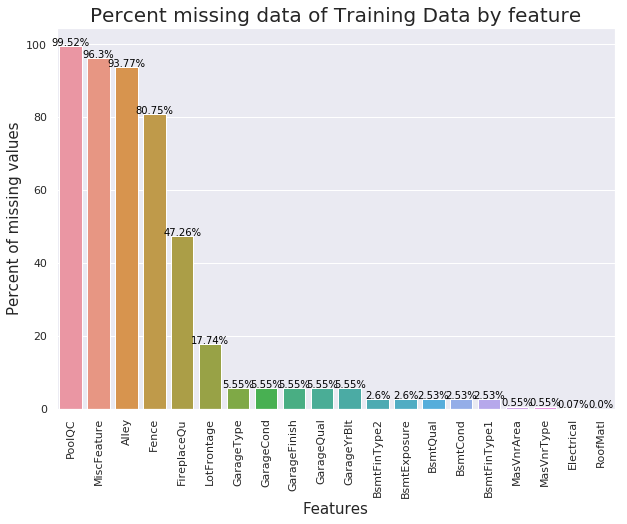

In [15]:
## print barplot showing percentage of each feature

## initilize figure size
f,ax = plt.subplots(figsize = (10,7))

## rotate X ticks in case X ticks overhead
plt.xticks(rotation='90')

## choose first 20 rows assigning to barplot
sns.barplot(x=percent_missing_data.index[:20], y=percent_missing_data.iloc[:20,1]*100)

## assign X,Y label 
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

## assign plot title
plt.title('Percent missing data of Training Data by feature', fontsize=20)

## assign percentage value to each feature
for index, row in percent_missing_data.iloc[:20].iterrows():
    plt.text(int(row.Index),(row.Percent * 100) + 0.1,(np.around(row.Percent * 100,decimals=2)).astype(str) + "%",ha = "center",color = "black" )

## show plot
plt.show()

In [16]:
## drop feature which percentage of missing value > 15%
df_train_drop_useless = df_train.drop(percent_missing_data[percent_missing_data['Percent'] > 0.15].index,axis=1)

## check size of data after dropping
print(df_train_drop_useless.shape)

(1460, 74)


* Testing Data

In [17]:
## count how many missing value which features have
missing_total_test = df_test.isnull().sum().sort_values(ascending = False)

## calculate percentage of missing data of each feature
percent_test = (missing_total_test / df_test.isnull().count()).sort_values(ascending = False)

## combine total numbers and percent into a dataframe
percent_missing_data_test = pd.concat([missing_total_test,percent_test],axis=1,keys=['Total','Percent'],sort=False)

## assign a continus numbers to dataframe as Index to order to plot text value from each features in barplot
Index = range(0,79)
percent_missing_data_test['Index'] = Index

## print first 20 rows of data
percent_missing_data_test.head(25)

,Total,Percent,Index
PoolQC,1456,0.997944,0
MiscFeature,1408,0.965045,1
Alley,1352,0.926662,2
Fence,1169,0.801234,3
FireplaceQu,730,0.500343,4
LotFrontage,227,0.155586,5
GarageCond,78,0.053461,6
GarageFinish,78,0.053461,7
GarageYrBlt,78,0.053461,8
GarageQual,78,0.053461,9


Barplot: Percentage of testing missing value <a name = "testmissing">

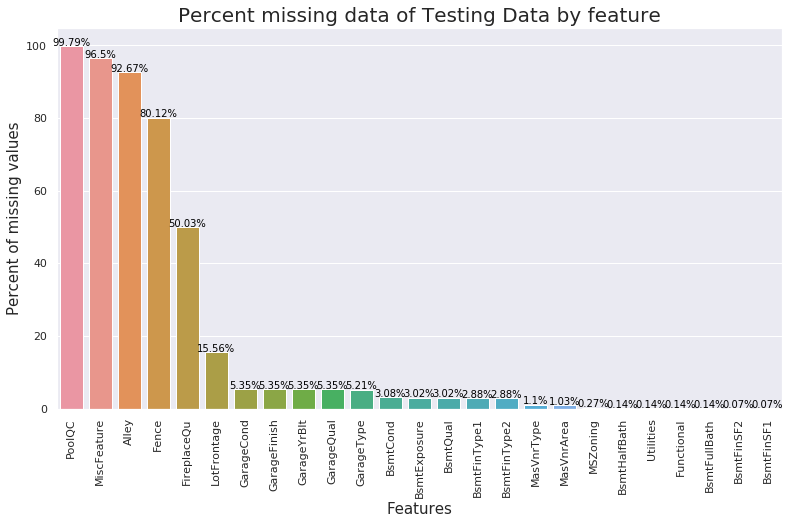

In [18]:
## print barplot showing percentage of each feature

## initilize figure size
f,ax = plt.subplots(figsize = (13,7))

## rotate X ticks in case X ticks overhead
plt.xticks(rotation='90')

## choose first 20 rows assigning to barplot
sns.barplot(x=percent_missing_data_test.index[:25], y=percent_missing_data_test.iloc[:25,1]*100)

## assign X,Y label 
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

## assign plot title
plt.title('Percent missing data of Testing Data by feature', fontsize=20)

## assign percentage value to each feature
for index, row in percent_missing_data_test.iloc[:25].iterrows():
    plt.text(int(row.Index),(row.Percent * 100) + 0.1,(np.around(row.Percent * 100,decimals=2)).astype(str) + "%",ha = "center",color = "black" )

## show plot
plt.show()

In [19]:
## drop feature which percentage of missing value > 15%
df_test_drop_useless = df_test.drop(percent_missing_data_test[percent_missing_data_test['Percent'] > 0.15].index,axis=1)

## check size of data after dropping
print(df_test_drop_useless.shape)

(1459, 73)


### 3.1.3 Fill missing value

* **Dealing with training Data**

In [20]:
## figure out why GarageType is missing
df_train_missing_Garage = df_train[df_train['GarageCond'].isnull() == True]
df_train_missing_Garage

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
99,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
108,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
125,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
127,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,87000
140,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


In [21]:
df_train_missing_Garage[['GarageCond','GarageType','GarageQual','GarageFinish','GarageYrBlt']]

,GarageCond,GarageType,GarageQual,GarageFinish,GarageYrBlt
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


According to datafrme showing below, I find missing data comes when a house doesn't have any garage.  
* **GargeCond,GarageType,GarageQual and GarageFinish**: Replace missing data with None

In [22]:
for col in ('GarageCond','GarageType','GarageQual','GarageFinish'):
    df_train_drop_useless[col] = df_train_drop_useless[col].fillna('None')

*** **GarageYrBlt**: Replace missing data with 0

In [23]:
df_train_drop_useless['GarageYrBlt'] = df_train_drop_useless['GarageYrBlt'].fillna(0)

In [24]:
## figure out why Basement value is missing
df_train_missing_Basement = df_train[df_train['BsmtCond'].isnull() == True]

In [25]:
df_train_missing_Basement[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


According to the result showing below: I find the missing data comes when a house doesn't have a basement.
* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: Replace missing data with None

In [26]:
for col in ('BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure'):
    df_train_drop_useless[col] = df_train_drop_useless[col].fillna('None')

In [27]:
## figure out why Masonry veneer value is missing
df_train_missing_Masonry = df_train[df_train['MasVnrType'].isnull() == True]

In [28]:
df_train_missing_Masonry[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


According to the result showing below: I find the missing data comes when a house doesn't have any Masonry veneer.
* **MasVnrType**: Replace missing data with None

In [29]:
df_train_drop_useless['MasVnrType'] = df_train_drop_useless['MasVnrType'].fillna('None')

* **MasVnrArea**: Replace missing data with 0

In [30]:
df_train_drop_useless['MasVnrArea'] = df_train_drop_useless['MasVnrArea'].fillna(0)

In [31]:
## figure out why Electrical value is missing
df_train[df_train['Electrical'].isnull() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [32]:
## count value
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

* **Electrical**: Replace missing data with 'SBrkr', because this feature has mostly 'SBrkr'

In [33]:
df_train_drop_useless['Electrical'] = df_train_drop_useless['Electrical'].fillna('SBrkr')

In [34]:
## double check training dataset
df_train_drop_useless.isnull().sum().max()

0

* Dealing with testing data

In [35]:
## figure out why GarageType is missing
df_test_missing_Garage = df_test[df_test['GarageCond'].isnull() == True]

In [36]:
df_test_missing_Garage[['GarageCond','GarageType','GarageQual','GarageFinish','GarageYrBlt']]

,GarageCond,GarageType,GarageQual,GarageFinish,GarageYrBlt
53,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN


According to datafrme showing below, I find missing data comes when a house doesn't have any garage.

* **GargeCond,GarageType,GarageQual and GarageFinish**: Replace missing data with None

In [37]:
for col in ('GarageCond','GarageType','GarageQual','GarageFinish'):
    df_test_drop_useless[col] = df_test_drop_useless[col].fillna('None')

* **GarageYrBlt**: Replace missing data with 0

In [38]:
df_test_drop_useless['GarageYrBlt'] = df_test_drop_useless['GarageYrBlt'].fillna(0)

In [39]:
## figure out why Basement value is missing
df_test_missing_Basement = df_test[df_test['BsmtCond'].isnull() == True]

In [40]:
df_test_missing_Basement[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure
125,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN
354,NaN,NaN,NaN,NaN,NaN
387,NaN,NaN,NaN,NaN,NaN
388,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN


According to the result showing below: I find the missing data comes when a house doesn't have a basement.

* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: Replace missing data with None

In [41]:
for col in ('BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure'):
    df_test_drop_useless[col] = df_test_drop_useless[col].fillna('None')

* figure out why Masonry veneer value is missing

In [42]:
df_test_missing_Masonry = df_test[df_test['MasVnrType'].isnull() == True]

In [43]:
df_test_missing_Masonry[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


According to the result showing below: I find the missing data comes when a house doesn't have any Masonry veneer.

* **MasVnrType**: Replace missing data with None

In [44]:
df_test_drop_useless['MasVnrType'] = df_test_drop_useless['MasVnrType'].fillna('None')

* **MasVnrArea**: Replace missing data with 0

In [45]:
df_test_drop_useless['MasVnrArea'] = df_test_drop_useless['MasVnrArea'].fillna(0)

In [46]:
## figure out why MS Zoning value is missing
df_test[df_test['MSZoning'].isnull() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [47]:
## count value
df_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

* **MS Zoning**: Replace missing data with 'RL', because this feature has mostly 'RL'

In [48]:
df_test_drop_useless['MSZoning'] = df_test_drop_useless['MSZoning'].fillna('RL')

* Drop all of other missing data because there are only 1 or 2 in whole dataset considers as outlier.

In [49]:
df_test_drop = df_test_drop_useless.dropna()

In [50]:
## double check testing dataset
df_test_drop.isnull().sum().max()

0

### 3.1.4. Transform some numercial features into their real datatype

#MSSubClass=The building class
df_train_drop_useless['MSSubClass'] = df_train_drop_useless['MSSubClass'].apply(str)

#Changing OverallCond,OverallQual into a categorical variable
df_train_drop_useless['OverallCond'] = df_train_drop_useless['OverallCond'].astype(str)
df_train_drop_useless['OverallQual'] = df_train_drop_useless['OverallQual'].astype(str)

#Year and month sold are transformed into categorical features.
df_train_drop_useless['YrSold'] = df_train_drop_useless['YrSold'].astype(str)
df_train_drop_useless['MoSold'] = df_train_drop_useless['MoSold'].astype(str)
df_train_drop_useless['YearBuilt'] = df_train_drop_useless['YearBuilt'].astype(str)
df_train_drop_useless['YearRemodAdd'] = df_train_drop_useless['YearRemodAdd'].astype(str)
df_train_drop_useless['GarageYrBlt'] = df_train_drop_useless['GarageYrBlt'].astype(str)
df_train_drop_useless['GarageCars'] = df_train_drop_useless['GarageCars'].astype(str)

## 3.2 Beyond Analytics:Understanding value of the Data <a name = 'understandvalue'>

### 3.2.1. Understanding label(sale price)

In [51]:
## overview SalePrice
df_train_drop_useless['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribution plot and Probability plot <a name = 'sale'>

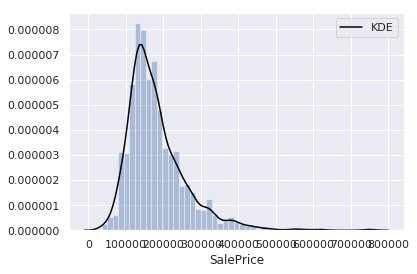

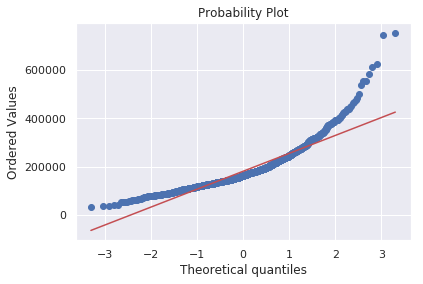

In [52]:
## plot distribution plot
sns.distplot(df_train_drop_useless['SalePrice'],kde_kws={"color":"black","label":"KDE"})

## plot probability plot
fig = plt.figure()
res = stats.probplot(df_train_drop_useless['SalePrice'],plot=plt)
plt.show()

In [53]:
#skewness and kurtosis
print("Skewness: %f" % df_train_drop_useless['SalePrice'].skew())
print("Kurtosis: %f" % df_train_drop_useless['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* Normalize Sale Price

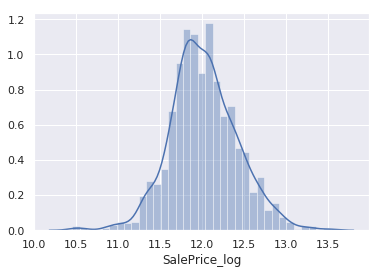

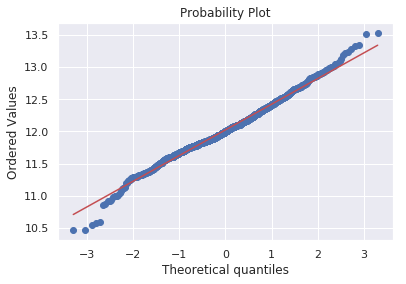

In [54]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train_drop_useless["SalePrice_log"] = np.log1p(df_train_drop_useless["SalePrice"])

#Check the new distribution 
sns.distplot(df_train_drop_useless['SalePrice_log']);

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train_drop_useless['SalePrice_log'], plot=plt)
plt.show()

In [55]:
#skewness and kurtosis
print("Skewness: %f" % df_train_drop_useless['SalePrice'].skew())
print("Kurtosis: %f" % df_train_drop_useless['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 3.2.2.Understanding numerical features

* Ground Living Area<a name = 'gla'>

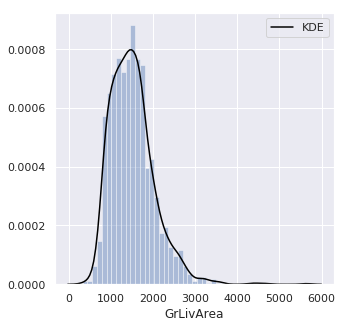

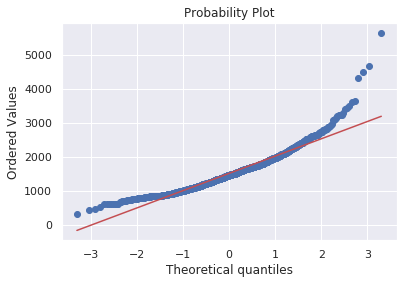

In [56]:
## plot Ground living area with dist plot 
f,ax = plt.subplots(figsize=(5,5))
sns.distplot(df_train_drop_useless['GrLivArea'],kde_kws={"color":"black","label":"KDE"})

## also plot probability plot
fig = plt.figure()
res =  stats.probplot(df_train_drop_useless['GrLivArea'],plot = plt)
plt.show()

In [57]:
#skewness and kurtosis
print("Skewness: %f" % df_train_drop_useless['GrLivArea'].skew())
print("Kurtosis: %f" % df_train_drop_useless['GrLivArea'].kurt())

Skewness: 1.366560
Kurtosis: 4.895121


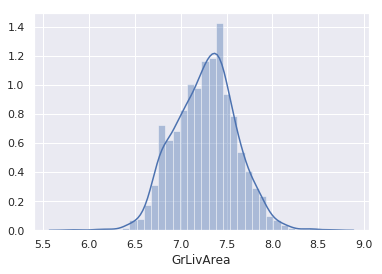

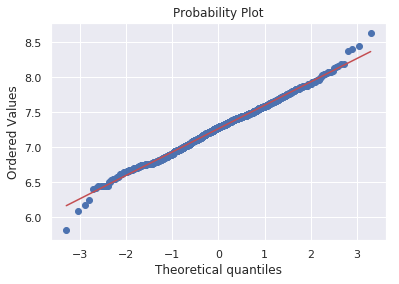

In [58]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train_drop_useless["GrLivArea"] = np.log1p(df_train_drop_useless["GrLivArea"])

#Check the new distribution 
sns.distplot(df_train_drop_useless['GrLivArea']);

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train_drop_useless['GrLivArea'], plot=plt)
plt.show()

* plot distribution dist plot of GarageArea feature<a name='gaf'>

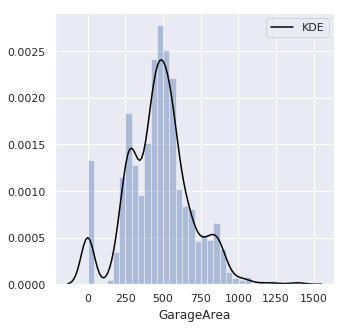

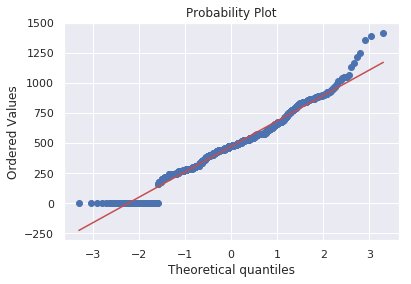

skewness: 0.17998090674623907
kurtosis: 0.9170672022708684


In [59]:
## plot GarageArea with dist plot 
f,ax = plt.subplots(figsize=(5,5))
sns.distplot(df_train_drop_useless['GarageArea'],kde_kws={"color":"black","label":"KDE"})

## also plot probability plot
fig = plt.figure()
res =  stats.probplot(df_train_drop_useless['GarageArea'],plot = plt)
plt.show()

print("skewness: {}".format(df_train_drop_useless['GarageArea'].skew()))
print("kurtosis: {}".format(df_train_drop_useless['GarageArea'].kurt()))


### 4. Feature engineering <a name = "engineering">
#### 4.1 Pre-built plot function<a name = 'prebuilt'>

* Box Plot from Plotly

In [60]:
def plotly_box_x_y(df,val_x,val_y):
    trace = []
    for name,group in df[[val_x,val_y]].groupby(val_x):
        trace.append(go.Box(y = group[val_y].values, 
                        boxpoints = 'all',
                        name = name))
    layout = go.Layout(
    title = val_x + ' vs ' + val_y,
    xaxis = dict(
        title = val_x,
        ticklen = 5),
    yaxis = dict(
        title = val_y,
        ticklen = 5))
    fig = go.Figure(data=trace,layout=layout)
    iplot(fig)
    

* Scatter Plot from Plotly

In [61]:
def plotly_scatter_x_y(df,val_x,val_y):
    fig = {'data': [{
        'x' : df[val_x],
        'y' : df[val_y],
        'mode' : 'markers'
    }],
          'layout' : {
              'title' : val_x + ' vs ' + val_y,
              'xaxis' : {'title' : val_x},
              'yaxis' : {'title' : val_y}
          }}
    iplot(fig)
    

* Scatter Plot group by from Plotly

In [62]:
def plotly_scatter_x_y_catg_color(df, val_x, val_y, val_z):
    
    catg_for_colors = sorted(df[val_z].unique().tolist())

    fig = { 'data': [{ 'x': df[df[val_z]==catg][val_x],
                       'y': df[df[val_z]==catg][val_y],    
                       'name': catg, 
                       'text': df[val_z][df[val_z]==catg], 
                       'mode': 'markers',
                       'marker': {'size': 6},
                      
                     } for catg in catg_for_colors       ],
                       
            'layout': { 
                        'title' : val_x + ' vs ' + val_y + ' group by ' + val_z,
                        'xaxis': {'title': val_x},
                        'yaxis': {'title': val_y},                    
                        'colorway' : ['#a9a9a9', '#e6beff', '#911eb4', '#4363d8', '#42d4f4',
                                      '#3cb44b', '#bfef45', '#ffe119', '#f58231', '#e6194B'],
                        'autosize' : False, 
                        'width' : 750, 
                        'height' : 600,
                      }
           }
  
    iplot(fig)

* Scatter plot 3D from Plotly

In [63]:
def plotly_scatter3d(df, val_x, val_y, val_z) :

    trace = go.Scatter3d( x = df[val_x], y = df[val_y], z = df[val_z],
                           mode='markers',
                           marker=dict( size=5, color=y,               
                                        colorscale='Viridis',  
                                        opacity=0.8 )
                          )
    data = [trace]
    camera = dict( up=dict(x=0, y=0, z=1),
                   center=dict(x=0, y=0, z=0.0),
                   eye=dict(x=2.5, y=0.1, z=0.8) )

    layout = go.Layout( title= val_z + " as function of " +  
                               val_x + " and " + val_y ,
                        autosize=False, width=700, height=600,               
                        margin=dict( l=15, r=25, b=15, t=30 ) ,
                        scene=dict(camera=camera,
                                   xaxis = dict(title=val_x),
                                   yaxis = dict(title=val_y),
                                   zaxis = dict(title=val_z),                                   
                                  ),
                       )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

#### 4.2 Feature selection <a name = "selection">

#### 4.2.1 Data filtering
* cut off by Pearson correlation coefficient

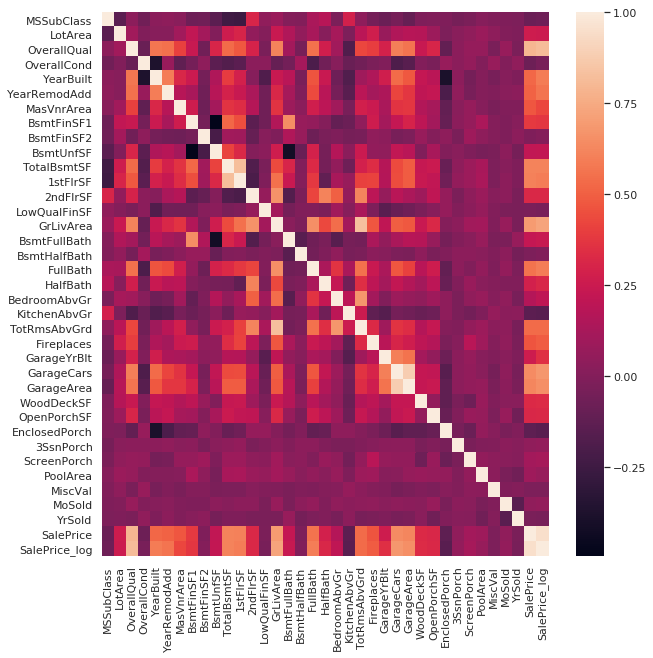

In [64]:
## show relationship among all of the feature by using heatmap
#correlation matrix
corrmat = df_train_drop_useless.corr()

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat)

Barplot: Pearson correlation<a name = 'barpearson'>

Text(0.5, 1.0, 'Pearson correlation coefficient')

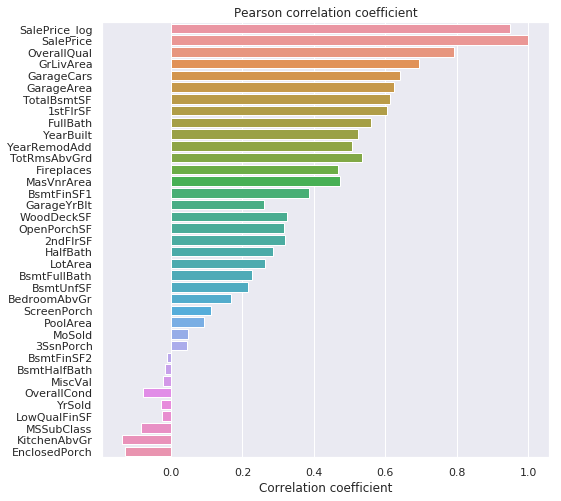

In [65]:
data = corrmat.sort_values(by=['SalePrice_log'],ascending=False)
x = data['SalePrice']
y = data.index
## bar plot showing more clear
f,ax = plt.subplots(figsize = (8,8))
sns.barplot(x,y)
sns.set_color_codes('pastel')
plt.xlabel('Correlation coefficient')
plt.title('Pearson correlation coefficient')

In [66]:
## compare corrlation value between sale price and all others feartures, figure out how many fearture moderate relationship with sale price(out put)
select_pos = corrmat['SalePrice_log'] >= 0.4  
select_nag = corrmat['SalePrice_log'] <= -0.4
select_pos = select_pos[select_pos == True]
print(select_pos.count()-1)
select_nag = select_nag[select_nag == True]
print(select_nag.count()-1)

13
-1


In [67]:
index = corrmat.nlargest(14,'SalePrice_log')['SalePrice_log'].index
index_drop = index.drop(['SalePrice'])
index_drop

Index(['SalePrice_log', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea'],
      dtype='object')

In [68]:
## show relationship among top 11 features by using heatmap
corr_after = df_train_drop_useless[index_drop].corr()
corr_after


,SalePrice_log,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea
SalePrice_log,1.000000,0.817185,0.730254,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608,0.534422,0.489450,0.426776
OverallQual,0.817185,1.000000,0.614207,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684,0.427452,0.396765,0.407252
GrLivArea,0.730254,0.614207,1.000000,0.496126,0.476164,0.435860,0.551440,0.653167,0.235500,0.311456,0.825521,0.468924,0.360905
GarageCars,0.680625,0.600671,0.496126,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622,0.362289,0.300789,0.361945
GarageArea,0.650888,0.562022,0.476164,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600,0.337822,0.269141,0.370884
TotalBsmtSF,0.612134,0.537808,0.435860,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066,0.285573,0.339519,0.360067
1stFlrSF,0.596981,0.476224,0.551440,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379,0.409516,0.410531,0.339850
FullBath,0.594771,0.550600,0.653167,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046,0.554784,0.243671,0.272999
YearBuilt,0.586570,0.572323,0.235500,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855,0.095589,0.147716,0.311600
YearRemodAdd,0.565608,0.550684,0.311456,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000,0.191740,0.112581,0.176529


* Pearson Correlation Heatmap<a name='pearsonheatmap'>

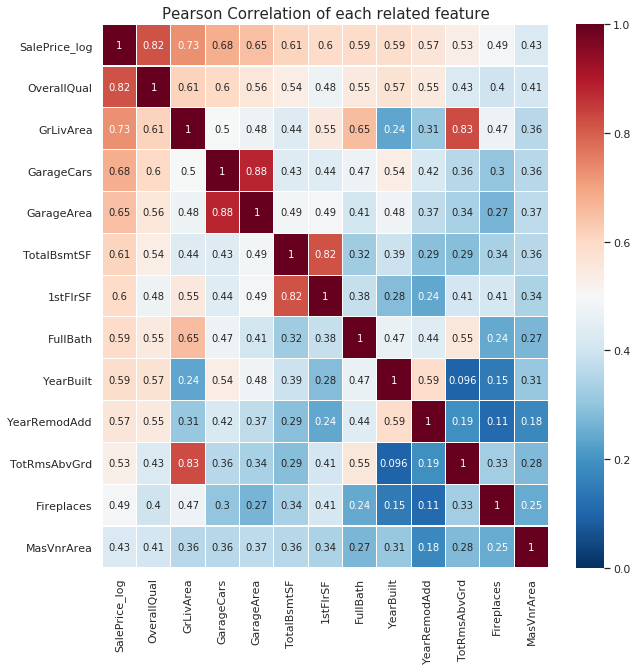

In [69]:
## plot heatmap
colormap = plt.cm.RdBu_r
f,ax = plt.subplots(figsize=(10,10))
plt.title('Pearson Correlation of each related feature',size = 15)
sns.heatmap(corr_after,linecolor='white',linewidths=0.1,cmap=colormap,annot=True,vmax=1.0,vmin=0)

#### 4.2.2 Data wrapping
* cut off by Random forest <a name ='forest'>

In [70]:
x = df_train_drop_useless.iloc[:,0:-1]
y = df_train_drop_useless.iloc[:,-1]

## one-hot encoding categorical features
x_dummies = pd.get_dummies(x)

In [71]:
rf = RandomForestRegressor()
rf.fit(x_dummies,y)
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
features = x_dummies.columns
for f in range(0,30):
 print(("%2d) %-*s %f" % (f + 1, 30, features[f], importance[indices[f]])))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



 1) MSSubClass                     0.999109
 2) LotArea                        0.000347
 3) OverallQual                    0.000139
 4) OverallCond                    0.000073
 5) YearBuilt                      0.000048
 6) YearRemodAdd                   0.000028
 7) MasVnrArea                     0.000024
 8) BsmtFinSF1                     0.000018
 9) BsmtFinSF2                     0.000013
10) BsmtUnfSF                      0.000013
11) TotalBsmtSF                    0.000012
12) 1stFlrSF                       0.000012
13) 2ndFlrSF                       0.000009
14) LowQualFinSF                   0.000009
15) GrLivArea                      0.000007
16) BsmtFullBath                   0.000007
17) BsmtHalfBath                   0.000006
18) FullBath                       0.000006
19) HalfBath                       0.000006
20) BedroomAbvGr                   0.000006
21) KitchenAbvGr                   0.000005
22) TotRmsAbvGrd                   0.000005
23) Fireplaces                  

* cut off by xgboost regressor

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

every_column_except_y= [col for col in df_train_drop_useless.columns if col not in ['SalePrice','Id']]
model.fit(pd.get_dummies(df_train_drop_useless[every_column_except_y]),df_train_drop_useless['SalePrice'])

OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

### 4.3 Understand relationship between features and house price<a name="relation">
#### 4.3.1 Take a quick look for big picture <a name ='pairplot'>

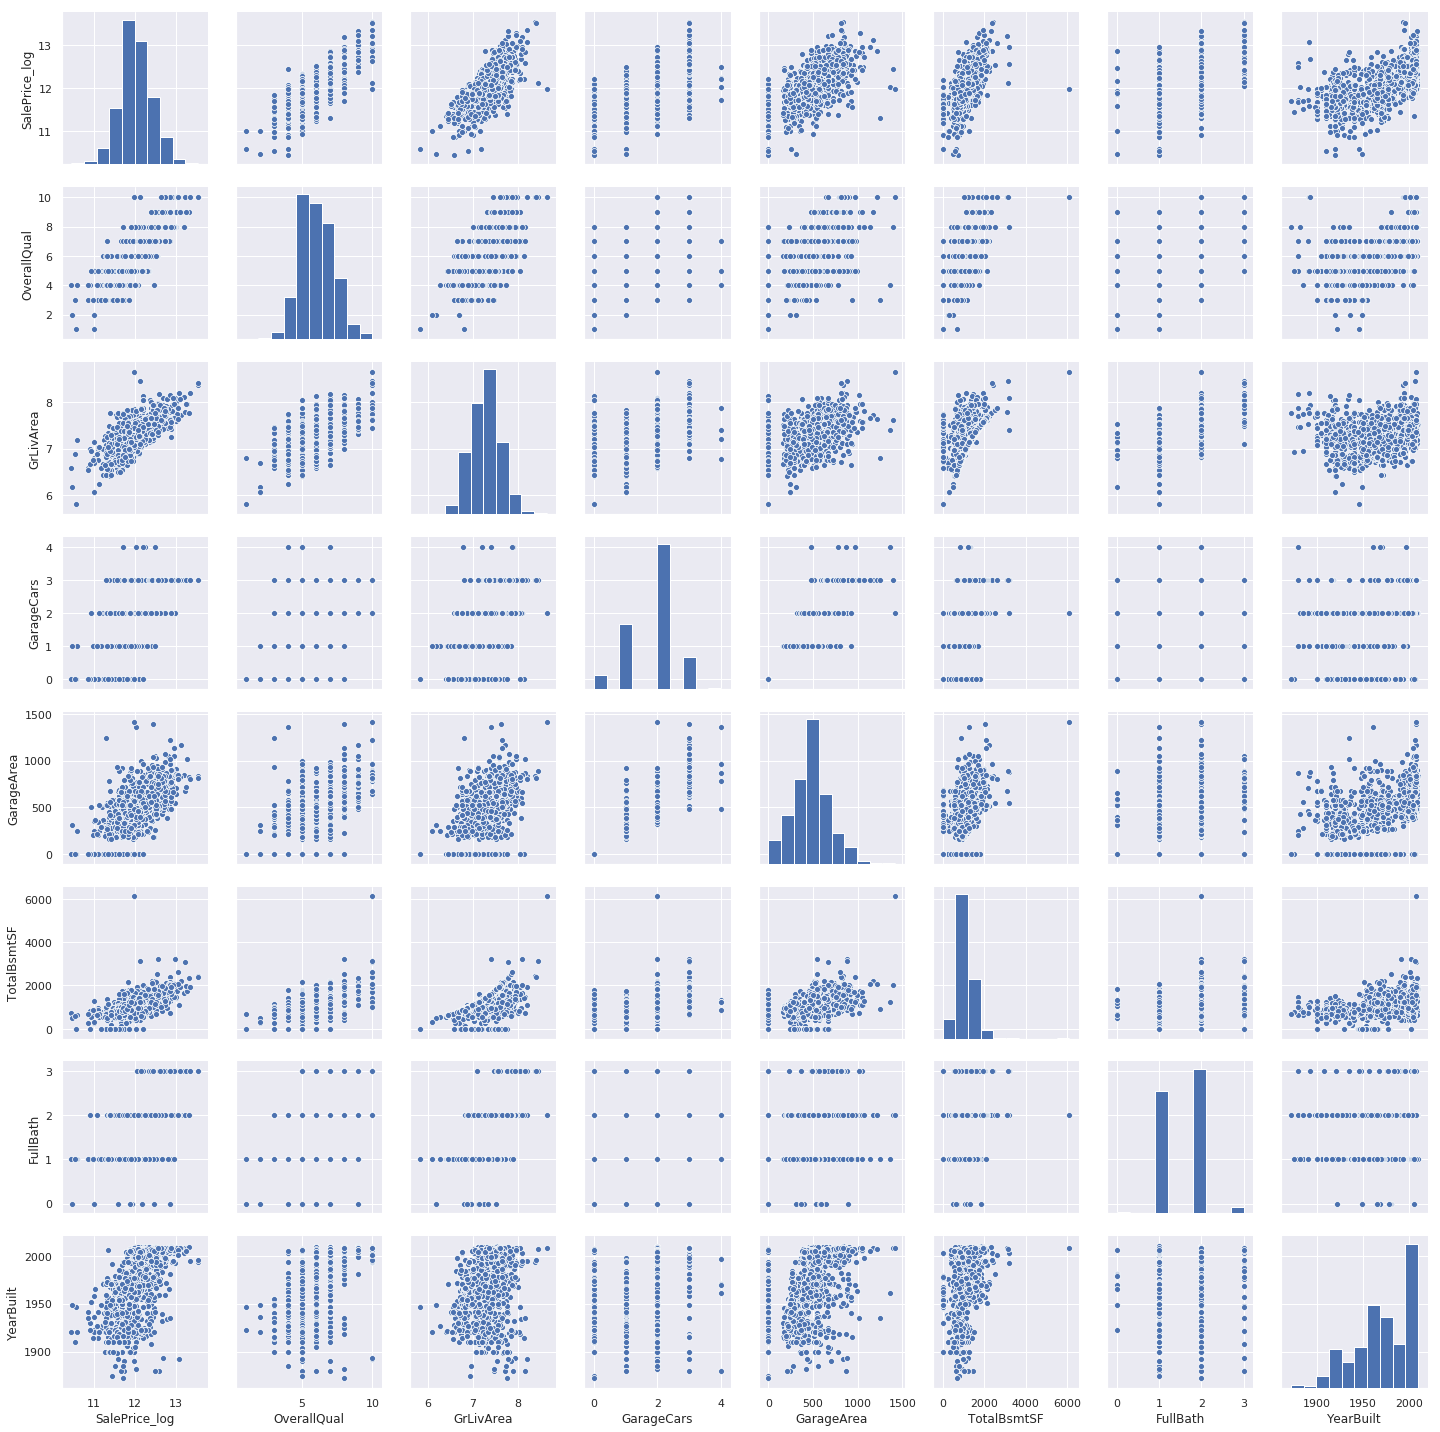

In [72]:
# scatterplot
cols = ['SalePrice_log', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train_drop_useless[cols], height = 2.5)

#### 4.3.2 Understand relationship between some numerical features and house price

* Ground living Area vs Sale Price Log<a name= 'scattergla'>

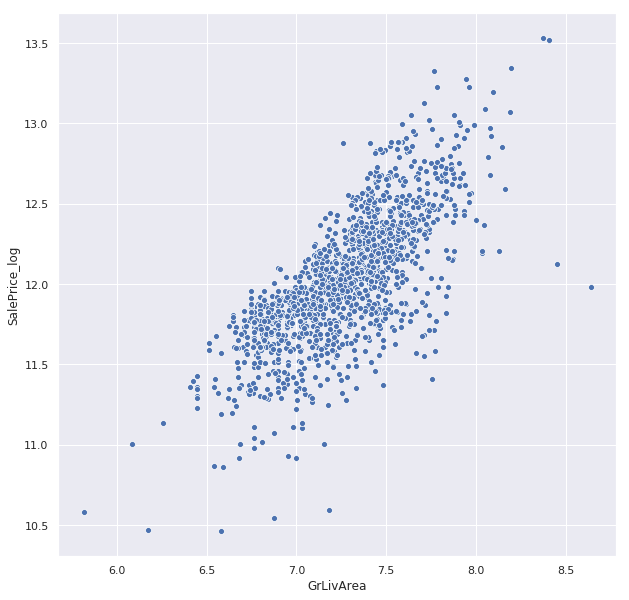

In [73]:
# show relationship between SalePrice and Living Area
plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_train_drop_useless['GrLivArea'],y=df_train_drop_useless['SalePrice_log'])

In [74]:
## drop outliers of data which sale price > 13.5 and living area > 4000
drop_index = df_train_drop_useless[(df_train_drop_useless['SalePrice_log'] > 13.5) | (df_train_drop_useless['GrLivArea'] > 8.3)].index
df_train_drop_outliers = df_train_drop_useless.drop(drop_index)
print(df_train_drop_outliers.shape)

(1456, 75)


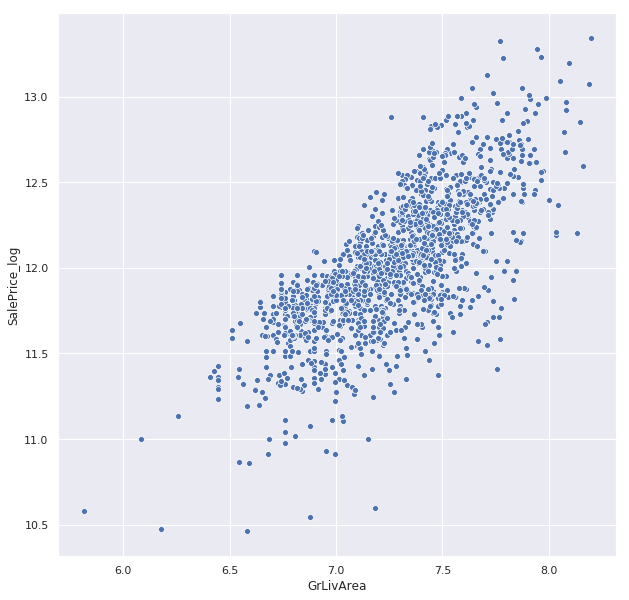

In [75]:
## show relationship between living area and Sale price after droping 
plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_train_drop_outliers['GrLivArea'],y=df_train_drop_outliers['SalePrice_log'],data=df_train)

* Ground living Area vs Sale price group by overall quality<a name="scattergla+">

In [76]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers, 'GrLivArea', 'SalePrice', 'OverallQual')

* Ground living Area vs Sale price group by overall quality<a name="scatter3Dgla">

In [77]:
plotly_scatter3d(df_train_drop_outliers,'GrLivArea', 'OverallQual', 'SalePrice')

* Area features VS Sale Price <a name='area'>

In [78]:
y_col_vals = 'SalePrice_log'
area_features = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'MasVnrArea', 'GarageArea', 'LotArea',
                 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1']
                # 'ScreenPorch'
x_col_vals = area_features

In [79]:
nr_rows=3
nr_cols=3

fig = tools.make_subplots(rows=nr_rows, cols=nr_cols, print_grid=False,
                          subplot_titles=area_features )
                                                                
for row in range(1,nr_rows+1):
    for col in range(1,nr_cols+1): 
        
        i = (row-1) * nr_cols + col-1
     
        trace = go.Scatter(x = df_train_drop_useless[x_col_vals[i]], 
                           y = df_train_drop_useless[y_col_vals], 
                           name=x_col_vals[i], 
                           mode="markers", 
                           opacity=0.8)

        fig.append_trace(trace, row, col,)
 
                                                                                                  
fig['layout'].update(height=700, width=900, showlegend=False,
                     title='SalePrice vs. Area features')
iplot(fig)                                                

/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



It shows that all of the Area features are positive related to sale price. In the Pearson correlation coefficient, it shows that Total Basement SF having very strong positive relation with first floor SF and we also obvered that Total Basement SF having strong positive relation with second floor SF. So I think it should have new feature sum all of area features.

In [80]:
df_train_drop_outliers['allarea'] = (df_train_drop_outliers['TotalBsmtSF'] + df_train_drop_outliers['1stFlrSF'] + df_train_drop_outliers['2ndFlrSF'] + df_train_drop_outliers['MasVnrArea']
                                    + df_train_drop_outliers['GarageArea']  + df_train_drop_outliers['WoodDeckSF'] + df_train_drop_outliers['OpenPorchSF']
                                    + df_train_drop_outliers['BsmtFinSF1'].astype(int))

df_test_drop['allarea'] = (df_test_drop['TotalBsmtSF'] + df_test_drop['1stFlrSF'] + df_test_drop['2ndFlrSF'] + df_test_drop['MasVnrArea']+ df_test_drop['GarageArea']
                        + df_test_drop['WoodDeckSF'] + df_test_drop['OpenPorchSF']+ df_test_drop['BsmtFinSF1'].astype(int))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
print(df_train_drop_outliers['allarea'].corr(df_train_drop_outliers['SalePrice_log']))

0.837384314107811


* All Area vs Sale price <a name="scatterallarea">

In [82]:
plotly_scatter_x_y(df_train_drop_outliers,'allarea','SalePrice')

#### 4.3.3 Understand relationship between some categorical features and house price

* Over all quality VS Sale Price log<a name='overall'>

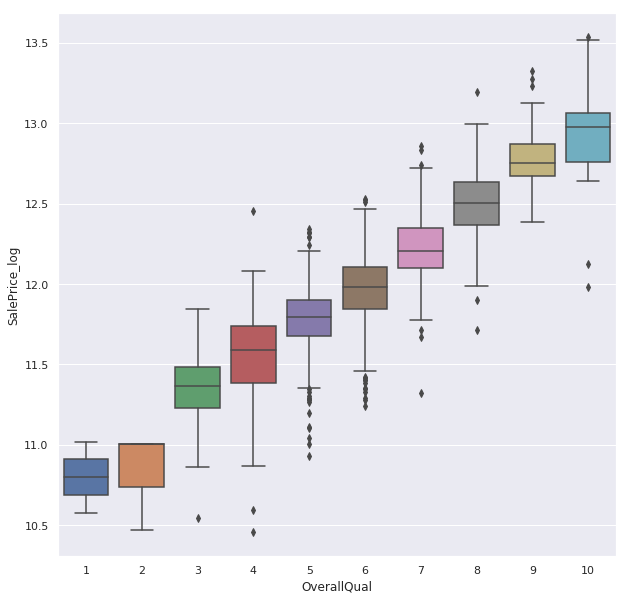

In [83]:
## show relationship between all quality and Sale price
f,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=df_train_drop_useless['OverallQual'],y=df_train_drop_useless['SalePrice_log'],data=df_train)

* Year Built VS Sale Price<a name='year'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

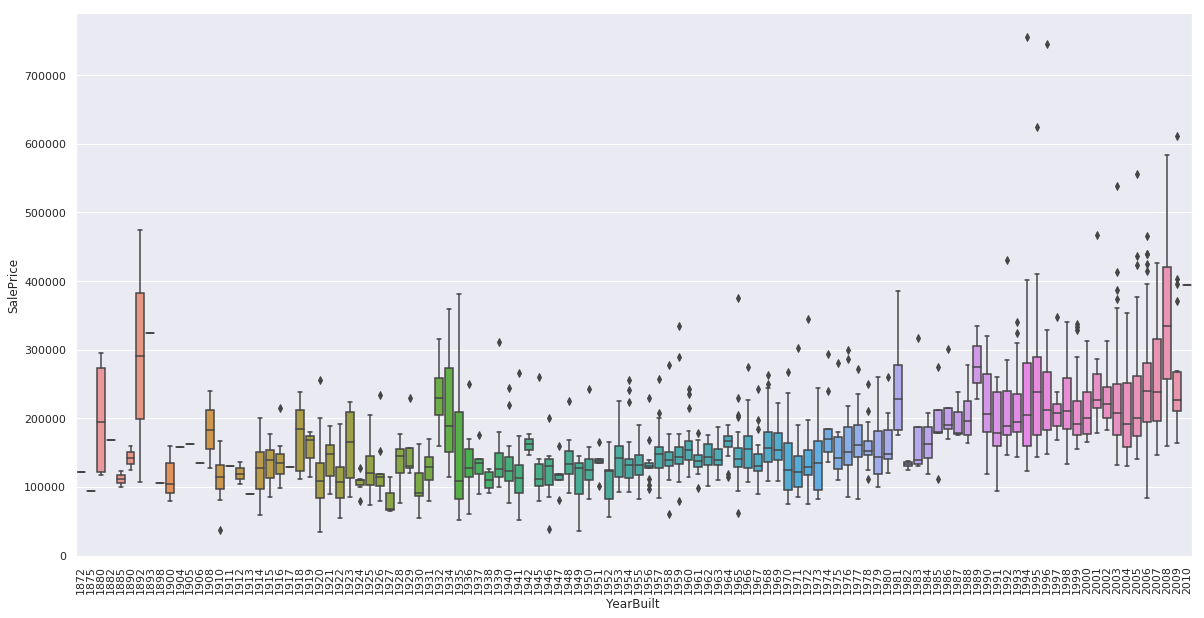

In [84]:
## show relationship between year built of house and sale price
f,ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=df_train_drop_useless['YearBuilt'],y=df_train_drop_useless['SalePrice'])
plt.xticks(rotation='90')

* Year Built VS Sale Price group by house style<a name='yearstyle'>

In [85]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers,'YearBuilt','SalePrice','HouseStyle')

* Year Built VS Sale Price group by Neighbourhood<a name='yearneigh'>

In [86]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers,'YearBuilt','SalePrice','Neighborhood')

* MS Zooming vs Sale Price<a name='ms'>

In [87]:
## show relationship between MS Zooming and sale price
plotly_box_x_y(df_train_drop_outliers,'MSZoning','SalePrice')

* MS SubClass vs Sale Price<a name='msclass'>

In [88]:
plotly_box_x_y(df_train_drop_outliers,'MSSubClass','SalePrice')

* Neighbourhood vs Sale Price<a name='neighbourhood'>

In [89]:
## show relationship between MS Zooming and sale price
plotly_box_x_y(df_train_drop_outliers,'Neighborhood','SalePrice')

* All Area vs Sale Price group by Neighborhood

In [90]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers,'allarea','SalePrice','Neighborhood')

#### 4.3.4 Understand relationship between features

* Garage Car vs Garage Area<a name='garagecar'>

In [91]:
plotly_box_x_y(df_train_drop_useless,'GarageCars','GarageArea')

* Total Rooms Grade vs Ground Living Area<a name='glatagbox'>

In [92]:
plotly_box_x_y(df_train_drop_outliers,'TotRmsAbvGrd','GrLivArea')

* Pattern inside Year sold <a name='yearsold'>

In [93]:
Year_sold = df_train_drop_outliers['YrSold'].value_counts().reset_index()
Year_sold.sort_values('index',inplace = True)

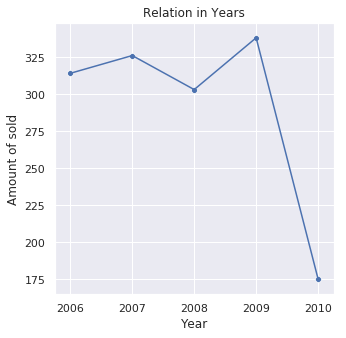

In [94]:
f,ax = plt.subplots(figsize=(5,5))
sns.lineplot(x = 'index',y = 'YrSold',data = Year_sold)
sns.scatterplot(x = 'index',y = 'YrSold',data = Year_sold)
plt.ylabel('Amount of sold')
plt.xlabel('Year')
plt.title('Relation in Years')
plt.show()

* Pattern inside Month sold <a name='monthsold'>

In [95]:
Month_sold = df_train_drop_outliers['MoSold'].value_counts().reset_index()
Month_sold.sort_values('index',inplace = True)

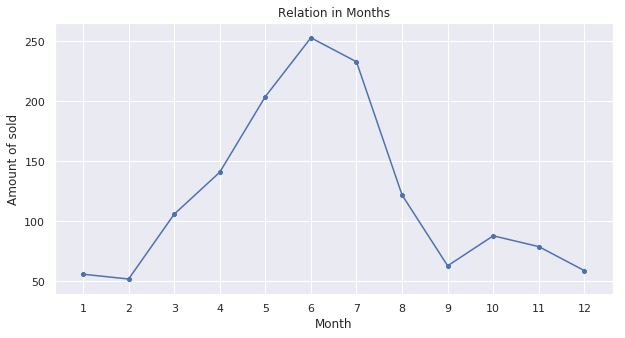

In [96]:
f,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = 'index',y = 'MoSold',data = Month_sold)
sns.scatterplot(x = 'index',y = 'MoSold',data = Month_sold)
plt.ylabel('Amount of sold')
plt.xlabel('Month')
plt.title('Relation in Months')
plt.xticks(range(1,13))
plt.show()

# 5. Build Model<a name=''>

## 5.1 Prepareing Dataset<a name='predata'>

In [97]:
corr_final = df_train_drop_outliers.corr()
features_boolean = corr_final['SalePrice_log'] > 0.4
features = features_boolean[features_boolean == True].index
features = features.drop(['TotalBsmtSF','1stFlrSF','SalePrice','GarageArea','MasVnrArea','SalePrice_log'])

In [98]:
features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'allarea'],
      dtype='object')

In [99]:
list_dummies = ['OverallQual','FullBath','Fireplaces','GarageCars']

In [100]:
y,y_log = df_train_drop_outliers['SalePrice'],df_train_drop_outliers['SalePrice_log']

In [101]:
all_data = pd.concat((df_train_drop_outliers[features],df_test_drop[features]))
all_data_dummies = pd.get_dummies(all_data,columns=list_dummies,drop_first=True)
df_train = all_data_dummies[:df_train_drop_outliers.shape[0]]
df_test = all_data_dummies[df_train_drop_outliers.shape[0]:]

In [102]:
sc = StandardScaler()
x_train_dummies_fit = sc.fit_transform(df_train)
df_x_train = pd.DataFrame(x_train_dummies_fit)
df_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.053769,0.880629,0.548227,0.927120,0.295366,-0.045439,-0.118015,-0.294223,-0.612276,-0.587925,...,0.0,-0.896779,-0.290069,-0.052486,0.0,-0.582637,0.877005,-0.373203,-0.058702,0.0
1,0.159469,-0.427190,-0.378408,-0.314155,0.439290,-0.045439,-0.118015,-0.294223,-0.612276,1.700896,...,0.0,1.115102,-0.290069,-0.052486,0.0,-0.582637,0.877005,-0.373203,-0.058702,0.0
2,0.987524,0.832191,0.680880,-0.314155,0.237953,-0.045439,-0.118015,-0.294223,-0.612276,-0.587925,...,0.0,1.115102,-0.290069,-0.052486,0.0,-0.582637,0.877005,-0.373203,-0.058702,0.0
3,-1.860986,-0.717817,0.560689,0.306482,-0.263815,-0.045439,-0.118015,-0.294223,-0.612276,-0.587925,...,0.0,1.115102,-0.290069,-0.052486,0.0,-0.582637,-1.140245,2.679510,-0.058702,0.0
4,0.954402,0.735316,1.314119,1.547757,1.383055,-0.045439,-0.118015,-0.294223,-0.612276,-0.587925,...,0.0,1.115102,-0.290069,-0.052486,0.0,-0.582637,-1.140245,2.679510,-0.058702,0.0


In [103]:
x_test_dummies_fit = sc.transform(df_test)
df_x_test = pd.DataFrame(x_test_dummies_fit)
df_x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.337364,-1.153757,2712.665591,-0.934793,-0.460433,-0.045439,-0.118015,-0.294223,1.633250,-0.587925,...,0.0,-0.896779,-0.290069,-0.052486,0.0,1.716333,-1.140245,-0.373203,-0.058702,0.0
1,-0.436731,-1.299070,4034.301954,-0.314155,0.572990,-0.045439,-0.118015,-0.294223,-0.612276,1.700896,...,0.0,-0.896779,-0.290069,-0.052486,0.0,1.716333,-1.140245,-0.373203,-0.058702,0.0
2,0.855035,0.638440,4949.985346,-0.314155,0.294579,-0.045439,-0.118015,-0.294223,1.633250,-0.587925,...,0.0,1.115102,-0.290069,-0.052486,0.0,-0.582637,0.877005,-0.373203,-0.058702,0.0
3,0.888158,0.638440,4873.678397,0.306482,0.248964,-0.045439,-0.118015,-0.294223,-0.612276,1.700896,...,0.0,1.115102,-0.290069,-0.052486,0.0,-0.582637,0.877005,-0.373203,-0.058702,0.0
4,0.689424,0.347814,3884.740333,-0.934793,-0.228424,-0.045439,-0.118015,-0.294223,-0.612276,-0.587925,...,0.0,-0.896779,-0.290069,-0.052486,0.0,-0.582637,0.877005,-0.373203,-0.058702,0.0


In [104]:
df_x_train.info()
df_x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 27 columns):
0     1456 non-null float64
1     1456 non-null float64
2     1456 non-null float64
3     1456 non-null float64
4     1456 non-null float64
5     1456 non-null float64
6     1456 non-null float64
7     1456 non-null float64
8     1456 non-null float64
9     1456 non-null float64
10    1456 non-null float64
11    1456 non-null float64
12    1456 non-null float64
13    1456 non-null float64
14    1456 non-null float64
15    1456 non-null float64
16    1456 non-null float64
17    1456 non-null float64
18    1456 non-null float64
19    1456 non-null float64
20    1456 non-null float64
21    1456 non-null float64
22    1456 non-null float64
23    1456 non-null float64
24    1456 non-null float64
25    1456 non-null float64
26    1456 non-null float64
dtypes: float64(27)
memory usage: 307.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 

## 5.2 Building simple model<a name='buildmodel'>

In [105]:
from sklearn.metrics import r2_score, mean_squared_error

In [106]:
#Validation function
n_folds = 5

def rmsle_cv(model,X,Y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

* Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

Build model using Y (Sale Price)

In [108]:
linear = LinearRegression()
linear_r_sq = linear.fit(df_x_train,y).score(df_x_train,y)
print('coefficient of determination:', linear_r_sq)

coefficient of determination: 0.8798205819174818


In [109]:
linear_score = rmsle_cv(linear,df_x_train,y)
print('Linear Score: {:.4f}'.format(linear_score.mean()))

Linear Score: 27440.1707


Build model using Y_log (Sale Price Log)

In [110]:
linear_log = LinearRegression()
linear_r_sq_log = linear_log.fit(df_x_train,y_log).score(df_x_train,y_log)
print('coefficient of determination:', linear_r_sq_log)

coefficient of determination: 0.8788185539541207


* Lasso Regression

In [111]:
from sklearn.linear_model import Lasso

Build model using Y (Sale Price)

In [112]:
lasso = Lasso(tol=0.1)
lasso_r_sq = lasso.fit(df_x_train,y).score(df_x_train,y)
print('coefficient of determination:', lasso_r_sq)

coefficient of determination: 0.8762683492948603


Build model using Y_log (Sale Price)

In [113]:
lasso_log = Lasso(alpha=0.000005,tol = 0.1)
lasso_r_sq_log = lasso_log.fit(df_x_train,y_log).score(df_x_train,y_log)
print('coefficient of determination:', lasso_r_sq_log)

coefficient of determination: 0.8735231491616589


Here, the key fact about LASSO regression is that it minimizes sum of squared error, under the constraint that the sum of absolute values of coefficients is less than some constant c. So, for all of the coefficients to be zero, there must be no vector of coefficients with summed absolute value less than c that improves error.

For another view, consider the LASSO loss function:

\begin{equation*}
\sum_{i = 1}^n (Y_i - X_i^T\beta) + \lambda\sum_{j=1}^p|\beta_j|
\end{equation*}

As put in the tutorial referenced above, "If λ is sufficiently large, some of the coefficients are driven to zero, leading to a sparse model." For it to be the case that zero coefficients minimize this function, λ must be large enough that any improvement in error (the left term) is less than the added loss from the increased norm (the right term).

It's common to use cross validation to set this parameter such that the model minimizes CV error. This could be why LassoCV gave you different results—it may have set λ for you.

* Ridge regression

In [114]:
from sklearn.linear_model import Ridge

Build model using Y (Sale Price)

In [115]:
ridge = Ridge()
ridge_r_sq = ridge.fit(df_x_train,y).score(df_x_train,y)
print('coefficient: ',ridge_r_sq)

coefficient:  0.8798198456999143


In [116]:
ridge_log = Ridge()
ridge_log_r_sq = ridge_log.fit(df_x_train,y_log).score(df_x_train,y_log)
print('coefficient: ',ridge_log_r_sq)

coefficient:  0.8786926703484034


* Elastic Net

In [117]:
from sklearn.linear_model import ElasticNet

Build model using Y (Sale Price)

In [118]:
elastic = ElasticNet()
elastic_r_sq = elastic.fit(df_x_train,y).score(df_x_train,y)
print('coefficient: ',elastic_r_sq)

coefficient:  0.8564966516401904


Build model using Y_log (Sale Price log)

In [119]:
elastic_log = ElasticNet(alpha=0.0005)
elastic_log_r_sq = elastic_log.fit(df_x_train,y_log).score(df_x_train,y_log)
print('coefficient: ',elastic_log_r_sq)

coefficient:  0.8780528510040584


* Random Forest

Build model using Y (Sale Price)

In [120]:
random = RandomForestRegressor()
print(random.fit(df_x_train,y).score(df_x_train,y))

0.9758640304783528


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Build model using Y_log (Sale Price log)

In [121]:
random_log = RandomForestRegressor()
print(random_log.fit(df_x_train,y_log).score(df_x_train,y_log))

0.9713498864147895


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### Model tuning and selection with GridSearchCV <a name='gridsearch'>

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
def get_best_score(grid):
    
    print(grid.best_score_)    
    print(grid.best_params_)
    print(grid.best_estimator_)

#### Linear Regression

In [124]:
linear = LinearRegression()
parameters = {
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
linear_grid = GridSearchCV(estimator= linear,param_grid=parameters,cv=5,verbose=1)

* Sale Price

In [125]:
linear_grid.fit(df_x_train,y)

get_best_score(linear_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8705866459898471
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



* Sale Price Log

In [126]:
linear_grid.fit(df_x_train,y_log)

get_best_score(linear_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8708996493487294
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



#### Random Forest Regression

random = RandomForestRegressor()
parameters = {
    'max_depth':[45,50,55,None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4, 5],
    'n_estimators': [800, 900, 1000]
}
random_grid = GridSearchCV(estimator=random,param_grid=parameters,cv= 5,n_jobs=1)

* Sale Price

random_grid.fit(df_x_train,y)
get_best_score(random_grid)

* Sale Price log

random_grid.fit(df_x_train,y_log)
get_best_score(random_grid)

### Summry <a name='sumsimple'>

In [127]:
score = [linear_r_sq,linear_r_sq_log,lasso_r_sq,lasso_r_sq_log,ridge_r_sq,ridge_log_r_sq,elastic_r_sq,elastic_log_r_sq]
regressors = ['Linear','Linear','Lasso','Lasso','Ridge','Ridge','Elastic Net','Elastic Net']
sale_type = ['sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log']
data = {
    'score':score,
    'regressors':regressors,
    'sale_price_type':sale_type
}

In [128]:
df_score = pd.DataFrame(data = data)
df_score.head()

,score,regressors,sale_price_type
0,0.879821,Linear,sale_price
1,0.878819,Linear,sale_price_log
2,0.876268,Lasso,sale_price
3,0.873523,Lasso,sale_price_log
4,0.879820,Ridge,sale_price


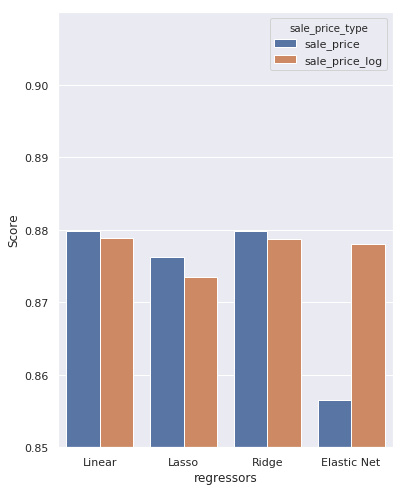

In [129]:
f,ax = plt.subplots(figsize=(6,8))
sns.barplot(x = 'regressors',y = 'score',hue = 'sale_price_type',data = df_score,ax = ax)
plt.ylabel('Score')
plt.yticks(np.arange(0.85,0.9,0.01))
plt.ylim((0.85,0.91))
plt.show()

## 5.3 Building emsemble model<a name='buildemsemble'>

In [130]:
from sklearn.ensemble import AdaBoostRegressor

* Linear Adaboost

Build model using Y (Sale Price)

In [131]:
linearada = AdaBoostRegressor(LinearRegression())
linearada.fit(df_x_train,y)
linearada_score = linearada.score(df_x_train,y)
print('coefficient: ',linearada_score)

coefficient:  0.7738013763717284


Build model using Y_log (Sale Price Log)

In [132]:
linearada_log = AdaBoostRegressor(LinearRegression())
linearada_log.fit(df_x_train,y_log)
linearada_score_log = linearada_log.score(df_x_train,y_log)
print('coefficient: ',linearada_score_log)

coefficient:  0.8302999768696293


* Lasso Adaboost

Build model using Y (Sale Price)

In [133]:
lassoada = AdaBoostRegressor(Lasso(tol=0.1))
lassoada.fit(df_x_train,y)
lassoada_score = lassoada.score(df_x_train,y)
print('coefficient: ',lassoada_score)

coefficient:  0.8657876124285698


Build model using Y_log (Sale Price log)

In [134]:
lassoada_log = AdaBoostRegressor(Lasso(alpha=0.000005,tol=0.2))
lassoada_log.fit(df_x_train,y_log)
lassoada_score_log = lassoada_log.score(df_x_train,y_log)
print('coefficient: ',lassoada_score_log)

coefficient:  0.8482871034619227


* Ridge Adaboost

Build model using Y (Sale Price)

In [135]:
Ridgeada = AdaBoostRegressor(Ridge())
Ridgeada.fit(df_x_train,y)
Ridgeada_score = Ridgeada.score(df_x_train,y)
print('coefficient: ',Ridgeada_score)

coefficient:  0.8741177551564004


Build model using Y_log (Sale Price log)

In [136]:
Ridgeada_log = AdaBoostRegressor(Ridge())
Ridgeada_log.fit(df_x_train,y_log)
Ridgeada_score_log = Ridgeada_log.score(df_x_train,y_log)
print('coefficient: ',Ridgeada_score_log)

coefficient:  0.870978962552787


* Elastic Net Adaboost

Build model using Y (Sale Price)

In [137]:
Elasticada = AdaBoostRegressor(ElasticNet())
Elasticada.fit(df_x_train,y)
Elasticada_score = Elasticada.score(df_x_train,y)
print('coefficient: ',Elasticada_score)

coefficient:  0.8660217297408356


Build model using Y_log (Sale Price log)

In [138]:
Elasticada_log = AdaBoostRegressor(ElasticNet(alpha = 0.05))
Elasticada_log.fit(df_x_train,y_log)
Elasticada_score_log = Elasticada_log.score(df_x_train,y_log)
print('coefficient: ',Elasticada_score_log)

coefficient:  0.8407449639118624


### Summry <a name='sumemsemble'>

In [139]:
score_em = [linearada_score,linearada_score_log,lassoada_score,lassoada_score_log,Ridgeada_score,Ridgeada_score_log,Elasticada_score,Elasticada_score_log]
regressors = ['Linear','Linear','Lasso','Lasso','Ridge','Ridge','Elastic Net','Elastic Net']
sale_type = ['sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log']
data_em = {
    'score':score_em,
    'regressors':regressors,
    'sale_price_type':sale_type
}

In [140]:
df_score_em = pd.DataFrame(data = data_em)
df_score_em.head()

,score,regressors,sale_price_type
0,0.773801,Linear,sale_price
1,0.830300,Linear,sale_price_log
2,0.865788,Lasso,sale_price
3,0.848287,Lasso,sale_price_log
4,0.874118,Ridge,sale_price


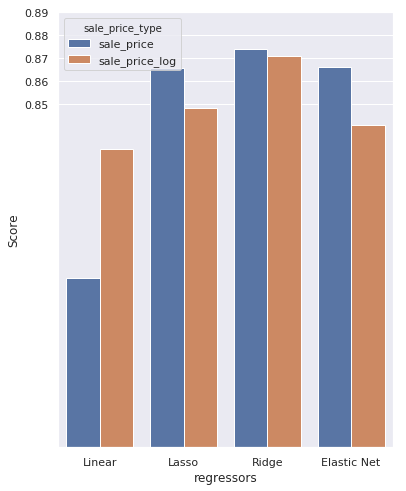

In [141]:
f,ax = plt.subplots(figsize=(6,8))
sns.barplot(x = 'regressors',y = 'score',hue = 'sale_price_type',data = df_score_em,ax = ax)
plt.ylabel('Score')
plt.yticks(np.arange(0.85,0.9,0.01))
plt.ylim((0.70,0.89))
plt.show()

## 5.4 Predict price and submission<a name='predict'>

In [158]:
random.fit(df_x_train,y)
test_prediction = random.predict(df_x_test)

In [161]:
df_test_prediction = pd.DataFrame(test_prediction)
df_test_prediction.columns = ['sale_price']
df_test_prediction.head()

,sale_price
0,140090.0
1,184400.0
2,220100.0
3,226950.0
4,220135.0


In [162]:
df_test_prediction.to_csv('submission.csv',index=False)

## 5.5 Neural Network<a name='tenor'>

In [163]:
import tensorflow as tf

In [164]:
input_dim = df_x_train
learning_rate = 0.002
n_nodes_l1 = 25
n_nodes_l2 = 25

x = tf.placeholder("float")
y = tf.placeholder("float")

def neural_net_model(data, input_dim):
    # 2 hidden layer feed forward neural net
    layer_1 = {'weights':tf.Variable(tf.random_normal([input_dim, n_nodes_l1])),
               'biases':tf.Variable(tf.random_normal([n_nodes_l1]))}

    layer_2 = {'weights':tf.Variable(tf.random_normal([n_nodes_l1, n_nodes_l2])),
               'biases':tf.Variable(tf.random_normal([n_nodes_l2]))}
    
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_l2, 1])),
                    'biases':tf.Variable(tf.random_normal([1]))}
    # affine function
    l1 = tf.add(tf.matmul(tf.cast(data, tf.float32), layer_1['weights']), layer_1['biases'])
    # relu activation
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, layer_2['weights']), layer_2['biases'])
    l2 = tf.nn.relu(l2)
    
    output = tf.add(tf.matmul(l2, output_layer['weights']), output_layer['biases'])

    return output